# 🧠 Predicción de Accidente Cerebrovascular (ACV)
## Actividad Integradora - Comparación de Modelos Supervisados

**Dataset:** Stroke Prediction Dataset (Kaggle)  
**Modelos:** KNN, Perceptrón, MLP  
**Equipo:** [Nombres de los integrantes]

---

## 1. Introducción y Descripción del Problema

### 1.1 Planteamiento del Problema

El **accidente cerebrovascular (ACV)** es una de las principales causas de muerte y discapacidad a nivel mundial. Según la Organización Mundial de la Salud, aproximadamente 15 millones de personas sufren un ACV anualmente, y de ellos, 5 millones mueren y otros 5 millones quedan con discapacidad permanente. **Predecir el riesgo de ACV** es crucial para implementar intervenciones médicas preventivas. Este proyecto busca desarrollar modelos de clasificación supervisada que, utilizando variables clínicas como edad, hipertensión, nivel de glucosa e IMC, puedan identificar pacientes con alto riesgo de sufrir un ACV, permitiendo a los profesionales de la salud tomar acciones preventivas oportunas.

### 1.2 Descripción del Dataset

| Característica | Valor |
|----------------|-------|
| **Nombre** | Stroke Prediction Dataset |
| **Fuente** | Kaggle |
| **Registros** | 5,110 |
| **Variables** | 12 (11 predictoras + 1 objetivo) |
| **Variable objetivo** | `stroke` (0 = No ACV, 1 = ACV) |

### 1.3 Variables del Dataset

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `id` | Numérica | Identificador único del paciente |
| `gender` | Categórica | Género del paciente (Male, Female, Other) |
| `age` | Numérica | Edad del paciente en años |
| `hypertension` | Binaria | 0 = sin hipertensión, 1 = con hipertensión |
| `heart_disease` | Binaria | 0 = sin enfermedad cardíaca, 1 = con enfermedad |
| `ever_married` | Categórica | Estado civil (Yes/No) |
| `work_type` | Categórica | Tipo de empleo (Private, Self-employed, Govt_job, children, Never_worked) |
| `Residence_type` | Categórica | Tipo de residencia (Urban/Rural) |
| `avg_glucose_level` | Numérica | Nivel promedio de glucosa en sangre (mg/dL) |
| `bmi` | Numérica | Índice de masa corporal |
| `smoking_status` | Categórica | Estado de fumador (formerly smoked, never smoked, smokes, Unknown) |
| `stroke` | **Objetivo** | **1 = tuvo ACV, 0 = no tuvo ACV** |

---
## 2. Librerías e Instalación

In [308]:
# Instalación de librerías necesarias
# %pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn -q

In [309]:
# Downgrade scikit-learn to a compatible version for imbalanced-learn
# %pip install scikit-learn==1.4.2 --force-reinstall -q
# import sklearn
# print("scikit-learn version after downgrade:", sklearn.__version__)

In [310]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sklearn - Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Sklearn - Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Sklearn - Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# SMOTE para balanceo de clases
from imblearn.over_sampling import SMOTE

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


---
## 3. EDA y Preprocesamiento

### 3.1 Carga y Exploración Inicial

In [311]:
# Cargar el dataset
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print("="*60)
print("INFORMACIÓN BÁSICA DEL DATASET")
print("="*60)
print(f"\nDimensiones: {df.shape[0]} registros x {df.shape[1]} columnas")
print(f"\nColumnas: {list(df.columns)}")

INFORMACIÓN BÁSICA DEL DATASET

Dimensiones: 5110 registros x 12 columnas

Columnas: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [312]:
# Primeras filas (head)
print("PRIMERAS 5 FILAS")
df.head()

PRIMERAS 5 FILAS


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [313]:
# Información de tipos de datos (info)
print("TIPOS DE DATOS")
df.info()

TIPOS DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [314]:
# Estadísticas descriptivas (describe)
print("ESTADÍSTICAS DESCRIPTIVAS")
df.describe()

ESTADÍSTICAS DESCRIPTIVAS


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 3.2 Análisis de Valores Faltantes

In [315]:
print("="*60)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)

# BMI tiene valores 'N/A' como string
if df['bmi'].dtype == 'object':
    missing_bmi = (df['bmi'] == 'N/A').sum()
else:
    missing_bmi = df['bmi'].isna().sum()

print(f"\nValores faltantes en BMI: {missing_bmi} ({(missing_bmi/len(df))*100:.2f}%)")

print("\nValores nulos por columna:")
print(df.isnull().sum())

ANÁLISIS DE VALORES FALTANTES

Valores faltantes en BMI: 201 (3.93%)

Valores nulos por columna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### 3.3 Distribución de la Variable Objetivo

In [316]:
print("="*60)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (STROKE)")
print("="*60)

stroke_counts = df['stroke'].value_counts()
stroke_pct = df['stroke'].value_counts(normalize=True) * 100

print(f"\nClase 0 (No ACV): {stroke_counts[0]} registros ({stroke_pct[0]:.2f}%)")
print(f"Clase 1 (ACV):    {stroke_counts[1]} registros ({stroke_pct[1]:.2f}%)")
print(f"\n⚠️ DATASET ALTAMENTE DESBALANCEADO - Ratio {stroke_counts[0]/stroke_counts[1]:.0f}:1")

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (STROKE)

Clase 0 (No ACV): 4861 registros (95.13%)
Clase 1 (ACV):    249 registros (4.87%)

⚠️ DATASET ALTAMENTE DESBALANCEADO - Ratio 20:1


### 3.4 Visualizaciones EDA

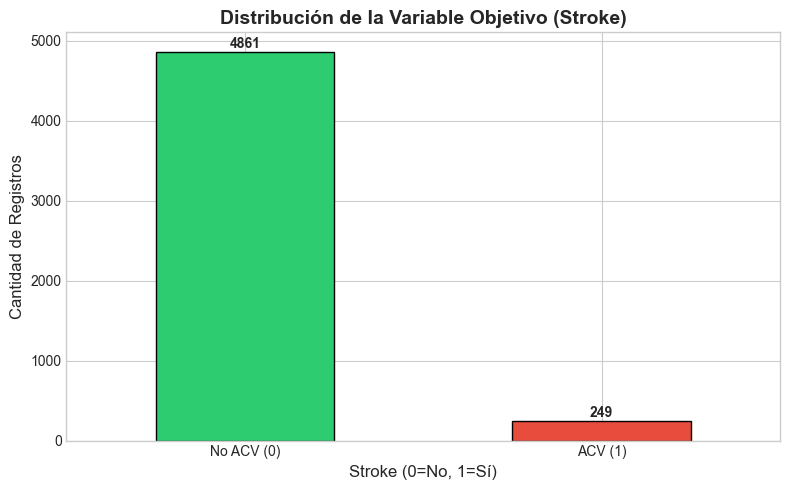

In [317]:
# Gráfico de barras - Distribución de stroke
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
df['stroke'].value_counts().plot(kind='bar', color=colors, edgecolor='black', ax=ax)
ax.set_title('Distribución de la Variable Objetivo (Stroke)', fontsize=14, fontweight='bold')
ax.set_xlabel('Stroke (0=No, 1=Sí)', fontsize=12)
ax.set_ylabel('Cantidad de Registros', fontsize=12)
ax.set_xticklabels(['No ACV (0)', 'ACV (1)'], rotation=0)

for i, v in enumerate(df['stroke'].value_counts()):
    ax.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

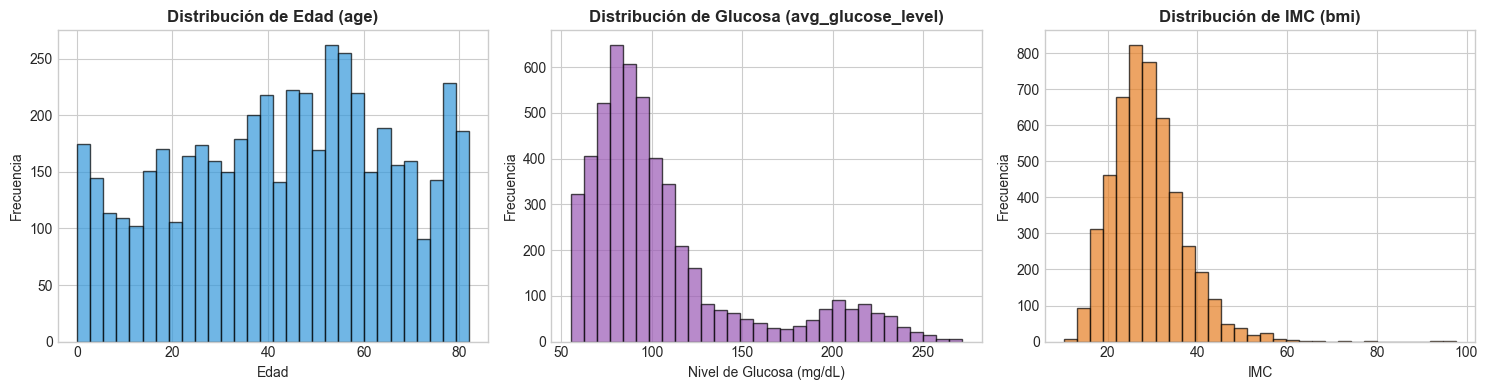

In [318]:
# Histogramas de variables numéricas: age, avg_glucose_level, bmi
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df_temp = df.copy()
df_temp['bmi'] = pd.to_numeric(df_temp['bmi'], errors='coerce')

# Age
axes[0].hist(df_temp['age'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Edad (age)', fontweight='bold')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Glucose
axes[1].hist(df_temp['avg_glucose_level'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Glucosa (avg_glucose_level)', fontweight='bold')
axes[1].set_xlabel('Nivel de Glucosa (mg/dL)')
axes[1].set_ylabel('Frecuencia')

# BMI
axes[2].hist(df_temp['bmi'].dropna(), bins=30, color='#e67e22', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribución de IMC (bmi)', fontweight='bold')
axes[2].set_xlabel('IMC')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

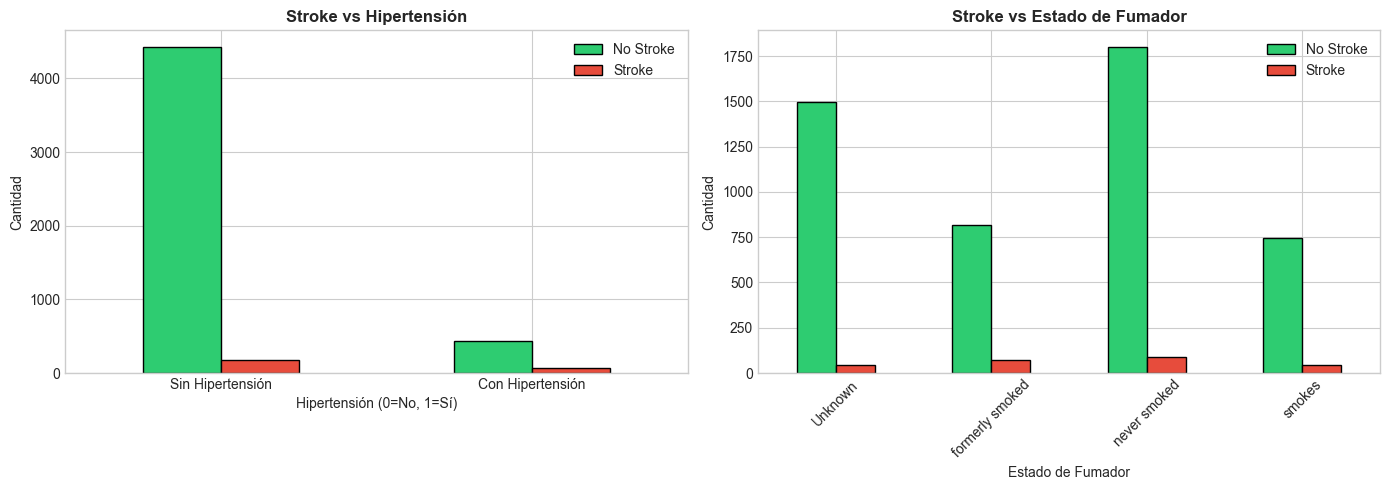

In [319]:
# Relación stroke vs hypertension y stroke vs smoking_status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stroke vs Hypertension
pd.crosstab(df['hypertension'], df['stroke']).plot(kind='bar', ax=axes[0], 
                                                    color=['#2ecc71', '#e74c3c'],
                                                    edgecolor='black')
axes[0].set_title('Stroke vs Hipertensión', fontweight='bold')
axes[0].set_xlabel('Hipertensión (0=No, 1=Sí)')
axes[0].set_ylabel('Cantidad')
axes[0].legend(['No Stroke', 'Stroke'])
axes[0].set_xticklabels(['Sin Hipertensión', 'Con Hipertensión'], rotation=0)

# Stroke vs Smoking Status
pd.crosstab(df['smoking_status'], df['stroke']).plot(kind='bar', ax=axes[1],
                                                      color=['#2ecc71', '#e74c3c'],
                                                      edgecolor='black')
axes[1].set_title('Stroke vs Estado de Fumador', fontweight='bold')
axes[1].set_xlabel('Estado de Fumador')
axes[1].set_ylabel('Cantidad')
axes[1].legend(['No Stroke', 'Stroke'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.5 Preprocesamiento de Datos

> **📝 Nota:** La documentación detallada de cada paso se encuentra en `docs/preprocesamiento.md`

In [320]:
# PASO 1: Eliminar columna ID
df_processed = df.copy()
df_processed = df_processed.drop('id', axis=1)
print("✓ PASO 1: Columna 'id' eliminada (no aporta información predictiva)")

✓ PASO 1: Columna 'id' eliminada (no aporta información predictiva)


In [321]:
# PASO 2: Imputar valores faltantes en BMI
df_processed['bmi'] = df_processed['bmi'].replace('N/A', np.nan)
df_processed['bmi'] = pd.to_numeric(df_processed['bmi'])

bmi_median = df_processed['bmi'].median()
df_processed['bmi'] = df_processed['bmi'].fillna(bmi_median)

print(f"✓ PASO 2: BMI imputado con MEDIANA = {bmi_median:.2f}")
print(f"  Justificación: La mediana es más robusta ante outliers que la media.")
print(f"  El BMI tiene distribución sesgada, la mediana representa mejor el valor central.")

✓ PASO 2: BMI imputado con MEDIANA = 28.10
  Justificación: La mediana es más robusta ante outliers que la media.
  El BMI tiene distribución sesgada, la mediana representa mejor el valor central.


In [322]:
# PASO 3: Codificación One-Hot de variables categóricas
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print(f"Variables categóricas a codificar: {categorical_cols}")
print(f"Columnas antes: {df_processed.shape[1]}")

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"Columnas después: {df_processed.shape[1]}")
print(f"\n✓ PASO 3: One-Hot Encoding aplicado")
print(f"  Se usa drop_first=True para evitar multicolinealidad")

Variables categóricas a codificar: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Columnas antes: 11
Columnas después: 17

✓ PASO 3: One-Hot Encoding aplicado
  Se usa drop_first=True para evitar multicolinealidad


In [323]:
# PASO 4: Separar características (X) y variable objetivo (y)
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

print(f"✓ PASO 4: Separación X/y")
print(f"  X (características): {X.shape}")
print(f"  y (objetivo): {y.shape}")

✓ PASO 4: Separación X/y
  X (características): (5110, 16)
  y (objetivo): (5110,)


In [324]:
# PASO 5: Partición Train-Test (80/20 estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"✓ PASO 5: Partición 80/20 con estratificación")
print(f"  Train: {len(X_train)} registros")
print(f"  Test:  {len(X_test)} registros")
print(f"\n  La estratificación mantiene la proporción de clases en ambos conjuntos")

✓ PASO 5: Partición 80/20 con estratificación
  Train: 4088 registros
  Test:  1022 registros

  La estratificación mantiene la proporción de clases en ambos conjuntos


In [325]:
# PASO 6: Escalado de variables numéricas (StandardScaler)
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit SOLO en train, transform en ambos (evita data leakage)
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"✓ PASO 6: StandardScaler aplicado a {numerical_cols}")
print(f"\n  ¿Por qué es importante el escalado?")
print(f"  - KNN: Usa distancia euclidiana, variables con mayor rango dominan el cálculo")
print(f"  - MLP: Los gradientes son más estables con datos normalizados")
print(f"  - Sin escalar: age (0-82) vs glucose (55-270) → glucose dominaría la distancia")

✓ PASO 6: StandardScaler aplicado a ['age', 'avg_glucose_level', 'bmi']

  ¿Por qué es importante el escalado?
  - KNN: Usa distancia euclidiana, variables con mayor rango dominan el cálculo
  - MLP: Los gradientes son más estables con datos normalizados
  - Sin escalar: age (0-82) vs glucose (55-270) → glucose dominaría la distancia


In [326]:
# PASO 7: Balanceo de clases con SMOTE (solo en entrenamiento)
print("\nDistribución ANTES de SMOTE:")
print(f"  Clase 0: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"  Clase 1: {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribución DESPUÉS de SMOTE:")
print(f"  Clase 0: {(y_train_balanced == 0).sum()} ({(y_train_balanced == 0).sum()/len(y_train_balanced)*100:.2f}%)")
print(f"  Clase 1: {(y_train_balanced == 1).sum()} ({(y_train_balanced == 1).sum()/len(y_train_balanced)*100:.2f}%)")

print(f"\n✓ PASO 7: SMOTE aplicado para balancear las clases")
print(f"  SMOTE genera ejemplos sintéticos de la clase minoritaria")
print(f"  Solo se aplica al conjunto de ENTRENAMIENTO (test permanece sin cambios)")


Distribución ANTES de SMOTE:
  Clase 0: 3889 (95.13%)
  Clase 1: 199 (4.87%)

Distribución DESPUÉS de SMOTE:
  Clase 0: 3889 (50.00%)
  Clase 1: 3889 (50.00%)

✓ PASO 7: SMOTE aplicado para balancear las clases
  SMOTE genera ejemplos sintéticos de la clase minoritaria
  Solo se aplica al conjunto de ENTRENAMIENTO (test permanece sin cambios)


In [327]:
# Resumen del preprocesamiento
print("="*60)
print("RESUMEN DEL PREPROCESAMIENTO")
print("="*60)
print(f"""
✓ Columna 'id' eliminada
✓ BMI imputado con mediana ({bmi_median:.2f})
✓ Variables categóricas codificadas (One-Hot Encoding)
✓ Partición 80/20 estratificada
✓ Variables numéricas estandarizadas (StandardScaler)
✓ SMOTE aplicado para balanceo de clases

Dimensiones finales:
  - X_train (balanceado): {X_train_balanced.shape}
  - X_test:               {X_test_scaled.shape}
""")

RESUMEN DEL PREPROCESAMIENTO

✓ Columna 'id' eliminada
✓ BMI imputado con mediana (28.10)
✓ Variables categóricas codificadas (One-Hot Encoding)
✓ Partición 80/20 estratificada
✓ Variables numéricas estandarizadas (StandardScaler)
✓ SMOTE aplicado para balanceo de clases

Dimensiones finales:
  - X_train (balanceado): (7778, 16)
  - X_test:               (1022, 16)



---
## 4. Comparación Sistemática de Variantes de Preprocesamiento

**Objetivo de esta sección:** Identificar la mejor combinación de técnicas de escalado, balanceo y umbral de decisión para cada modelo. Los resultados aquí determinarán la configuración que se utilizará en la Sección 5 (Entrenamiento y Optimización de Modelos).

Las comparaciones se realizan bajo las siguientes condiciones:
- **Modelos base:** KNN (k=5), Perceptrón (configuración básica), MLP (arquitectura simple)
- **Variaciones a probar:** 3 escaladores × 3 balanceadores × 3 umbrales = 27 combinaciones por modelo
- **Métrica de selección:** F1-Score (balance entre Precision y Recall)


### 4.1 Comparación de variantes para KNN

In [328]:
# Comparación de variantes de normalización, balanceo y ajuste de umbral
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}
balancers = {
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}
umbrales = [0.5, 0.4, 0.6]

def evaluate_with_threshold(model, X_test, y_test, threshold):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            y_proba = (model.decision_function(X_test) - model.decision_function(X_test).min())
            y_proba = y_proba / y_proba.max()
        else:
            y_proba = model.predict(X_test)
    y_pred = (y_proba >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }

results = []

for scaler_name, scaler in scalers.items():
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    for balancer_name, balancer in balancers.items():
        X_train_b, y_train_b = balancer.fit_resample(X_train_s, y_train)
        for threshold in umbrales:
            model = KNeighborsClassifier(n_neighbors=5)
            model.fit(X_train_b, y_train_b)
            metrics = evaluate_with_threshold(model, X_test_s, y_test, threshold)
            results.append({
                'Scaler': scaler_name,
                'Balancer': balancer_name,
                'Threshold': threshold,
                **metrics
            })

results_df = pd.DataFrame(results)
print("Comparación de variantes para KNN (ordenado por F1-Score):")
display(results_df.sort_values('Recall', ascending=False).reset_index(drop=True).head(5))

Comparación de variantes para KNN (ordenado por F1-Score):


,Scaler,Balancer,Threshold,Accuracy,Precision,Recall,F1-Score
0,StandardScaler,RandomUnderSampler,0.4,0.469667,0.080205,0.94,0.147799
1,RobustScaler,RandomUnderSampler,0.4,0.502935,0.083636,0.92,0.153333
2,MinMaxScaler,RandomUnderSampler,0.4,0.452055,0.076412,0.92,0.141104
3,StandardScaler,RandomUnderSampler,0.5,0.654599,0.093834,0.70,0.165485
4,StandardScaler,RandomUnderSampler,0.6,0.654599,0.093834,0.70,0.165485


### 4.2 Comparación de variantes para Perceptrón

In [329]:
# Perceptrón
results_perceptron = []

def evaluate_with_threshold_perceptron(model, X_test, y_test, threshold):
    if hasattr(model, "decision_function"):
        y_proba = (model.decision_function(X_test) - model.decision_function(X_test).min())
        y_proba = y_proba / y_proba.max()
    else:
        y_proba = model.predict(X_test)
    y_pred = (y_proba >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }

for scaler_name, scaler in scalers.items():
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    for balancer_name, balancer in balancers.items():
        X_train_b, y_train_b = balancer.fit_resample(X_train_s, y_train)
        for threshold in umbrales:
            model = Perceptron(max_iter=1000, eta0=0.1, tol=1e-3, random_state=42)
            model.fit(X_train_b, y_train_b)
            metrics = evaluate_with_threshold_perceptron(model, X_test_s, y_test, threshold)
            results_perceptron.append({
                'Scaler': scaler_name,
                'Balancer': balancer_name,
                'Threshold': threshold,
                **metrics
            })

results_perceptron_df = pd.DataFrame(results_perceptron)
print("Comparación de variantes para Perceptrón (ordenado por Recall):")
display(results_perceptron_df.sort_values('Recall', ascending=False).reset_index(drop=True).head(5))

Comparación de variantes para Perceptrón (ordenado por Recall):


,Scaler,Balancer,Threshold,Accuracy,Precision,Recall,F1-Score
0,StandardScaler,SMOTE,0.5,0.05773,0.049358,1.0,0.094073
1,StandardScaler,SMOTE,0.4,0.05773,0.049358,1.0,0.094073
2,StandardScaler,SMOTE,0.6,0.05773,0.049358,1.0,0.094073
3,StandardScaler,BorderlineSMOTE,0.5,0.05773,0.049358,1.0,0.094073
4,StandardScaler,BorderlineSMOTE,0.4,0.05773,0.049358,1.0,0.094073


### 4.3 Comparación de variantes para MLP

In [330]:
# MLP
results_mlp = []

def evaluate_with_threshold_mlp(model, X_test, y_test, threshold):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)
    y_pred = (y_proba >= threshold).astype(int)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }

for scaler_name, scaler in scalers.items():
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    for balancer_name, balancer in balancers.items():
        X_train_b, y_train_b = balancer.fit_resample(X_train_s, y_train)
        for threshold in umbrales:
            model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1)
            model.fit(X_train_b, y_train_b)
            metrics = evaluate_with_threshold_mlp(model, X_test_s, y_test, threshold)
            results_mlp.append({
                'Scaler': scaler_name,
                'Balancer': balancer_name,
                'Threshold': threshold,
                **metrics
            })

results_mlp_df = pd.DataFrame(results_mlp)
print("Comparación de variantes para MLP (ordenado por Recall):")
display(results_mlp_df.sort_values('Recall', ascending=False).reset_index(drop=True).head(5))

Comparación de variantes para MLP (ordenado por Recall):


,Scaler,Balancer,Threshold,Accuracy,Precision,Recall,F1-Score
0,StandardScaler,RandomUnderSampler,0.4,0.354207,0.067989,0.96,0.126984
1,MinMaxScaler,RandomUnderSampler,0.4,0.459883,0.076014,0.90,0.140187
2,RobustScaler,RandomUnderSampler,0.4,0.521526,0.083491,0.88,0.152513
3,RobustScaler,RandomUnderSampler,0.5,0.714286,0.121875,0.78,0.210811
4,MinMaxScaler,RandomUnderSampler,0.5,0.692759,0.111765,0.76,0.194872


## 5. Entrenamiento y Optimización de Modelos

En esta sección se entrenan los tres modelos supervisados (KNN, Perceptrón, MLP) utilizando las mejores configuraciones identificadas en la Sección 4 (comparación de variantes de preprocesamiento). Para cada modelo, se:

1. Aplica la mejor configuración de escalado y balanceo encontrada en la Sección 4
2. Optimiza los hiperparámetros específicos del modelo (k para KNN, arquitectura para MLP, etc.)
3. Selecciona el mejor modelo según las métricas de validación cruzada

In [331]:
# Función auxiliar para evaluar modelos
def evaluate_model(model, X_test, y_test, model_name, y_pred_override=None):
    """Evalúa un modelo y retorna métricas."""
    if y_pred_override is not None:
        y_pred = y_pred_override
    else:
        y_pred = model.predict(X_test)
    
    metrics = {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }
    
    return metrics, confusion_matrix(y_test, y_pred), y_pred

# Lista para almacenar todos los resultados
all_results = []

### Cambio de enfoque: Priorizar Recall

Basándonos en el análisis de instrucciones y contexto clínico, en esta sección se aplican configuraciones específicas que **priorizan Recall** sobre otras métricas. 

**¿Por qué Recall?**
- En diagnóstico médico de ACV: un **falso negativo (no detectar un caso real) es potencialmente fatal**
- Un falso positivo solo genera exámenes adicionales (costo aceptable)
- Recall = "¿De todos los casos reales de ACV, cuántos detectamos?" → **Queremos 100%**

**Estrategia de configuración:**
Cada modelo usa una combinación única de **escalador + balanceador + umbral** diseñada para maximizar la detección de casos positivos (ACV), aceptando algunos falsos positivos.

### 5.1 K-Nearest Neighbors (KNN)

**Configuración para KNN (prioritizando Recall):**
- **Escalador:** StandardScaler (normalización a media=0, std=1)
- **Balanceador:** RandomUnderSampler (reduce clase mayoritaria)
- **Umbral:** 0.4 (favorece detección de ACV vs falsos negativos)

Esta configuración busca maximizar la capacidad de **detectar pacientes con riesgo real de ACV**, aceptando más falsos positivos (revisiones adicionales) para evitar falsos negativos (no detectar ACV).

In [332]:
# Configuración para priorizar Recall (máxima detección de casos de ACV)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo con RandomUnderSampler para mejor Recall
from imblearn.under_sampling import RandomUnderSampler
random_under = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = random_under.fit_resample(X_train_scaled, y_train)

# Evaluar múltiples valores de k con threshold=0.4
k_values = list(range(3, 32, 2))  # Solo impares: [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
threshold = 0.4
knn_results = []

print(f"Evaluando {len(k_values)} valores impares de k (desde 3 hasta 31) con threshold={threshold}...\n")

for k in k_values:
    # Crear y entrenar modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_balanced, y_train_balanced)
    
    # Validación cruzada (5-fold) - Recall para priorizar detección de ACV
    cv_scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring='recall')
    
    # Predicción de probabilidades y ajuste de threshold
    y_proba = knn.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    # Evaluar en test
    metrics, cm, _ = evaluate_model(knn, X_test_scaled, y_test, f'KNN (k={k})', y_pred_override=y_pred)
    metrics['CV_F1_Mean'] = cv_scores.mean()
    metrics['CV_F1_Std'] = cv_scores.std()
    
    knn_results.append(metrics)
    
    print(f"k={k}: Acc={metrics['Accuracy']:.4f}, Prec={metrics['Precision']:.4f}, "
          f"Rec={metrics['Recall']:.4f}, F1={metrics['F1-Score']:.4f}, CV-F1={cv_scores.mean():.4f}")

# Tabla de resultados KNN
knn_df = pd.DataFrame(knn_results)
print("\n" + "="*60)
print("TABLA DE RESULTADOS KNN")
print("="*60)
print(knn_df[['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_F1_Mean']].to_string(index=False))

# Seleccionar mejor k (por Recall para priorizar detección de ACV)
best_knn_idx = knn_df['Recall'].idxmax()
best_k = k_values[best_knn_idx]
print(f"\n✓ Mejor k seleccionado: {best_k} (Recall = {knn_df.loc[best_knn_idx, 'Recall']:.4f})")

Evaluando 15 valores impares de k (desde 3 hasta 31) con threshold=0.4...

k=3: Acc=0.6438, Prec=0.0757, Rec=0.5600, F1=0.1333, CV-F1=0.6687
k=5: Acc=0.4697, Prec=0.0802, Rec=0.9400, F1=0.1478, CV-F1=0.6738
k=7: Acc=0.5235, Prec=0.0822, Rec=0.8600, F1=0.1501, CV-F1=0.7037
k=9: Acc=0.5362, Prec=0.0810, Rec=0.8200, F1=0.1475, CV-F1=0.7490
k=11: Acc=0.5460, Prec=0.0843, Rec=0.8400, F1=0.1533, CV-F1=0.7236
k=13: Acc=0.5744, Prec=0.0896, Rec=0.8400, F1=0.1618, CV-F1=0.7436
k=15: Acc=0.4980, Prec=0.0814, Rec=0.9000, F1=0.1493, CV-F1=0.7691
k=17: Acc=0.5127, Prec=0.0821, Rec=0.8800, F1=0.1502, CV-F1=0.7491
k=19: Acc=0.5294, Prec=0.0848, Rec=0.8800, F1=0.1547, CV-F1=0.7592
k=21: Acc=0.5519, Prec=0.0887, Rec=0.8800, F1=0.1612, CV-F1=0.7690
k=23: Acc=0.5568, Prec=0.0879, Rec=0.8600, F1=0.1596, CV-F1=0.7486
k=25: Acc=0.5117, Prec=0.0850, Rec=0.9200, F1=0.1557, CV-F1=0.7738
k=27: Acc=0.5274, Prec=0.0860, Rec=0.9000, F1=0.1571, CV-F1=0.7890
k=29: Acc=0.5274, Prec=0.0876, Rec=0.9200, F1=0.1600, CV-F

In [333]:
# Modelo KNN final
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_balanced, y_train_balanced)

knn_metrics, knn_cm, knn_pred = evaluate_model(knn_final, X_test_scaled, y_test, f'KNN (k={best_k})')
all_results.append(knn_metrics)

print(f"Modelo KNN Final (k={best_k}) guardado para comparación")

Modelo KNN Final (k=5) guardado para comparación


### 5.2 Perceptrón

**Configuración para Perceptrón (prioritizando Recall):**
- **Escalador:** StandardScaler (normalización a media=0, std=1)
- **Balanceador:** SMOTE (genera ejemplos sintéticos de la clase minoritaria)
- **Umbral:** 0.5 (punto equilibrio en probabilidades predichas)

Esta configuración genera datos sintéticos para la clase de ACV, permitiendo que el modelo aprenda mejor los patrones de la clase minoritaria.

In [334]:
# Configuración para priorizar Recall (máxima detección de casos de ACV)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo con SMOTE para mejor Recall
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Configuraciones de Perceptrón a probar
perceptron_configs = [
    {'max_iter': 1000, 'eta0': 0.1, 'tol': 1e-3},
    {'max_iter': 2000, 'eta0': 0.01, 'tol': 1e-3},
    {'max_iter': 1000, 'eta0': 1.0, 'tol': 1e-4},
    {'max_iter': 3000, 'eta0': 0.1, 'tol': 1e-4}
]

perceptron_results = []
threshold = 0.5

for i, config in enumerate(perceptron_configs):
    perceptron = Perceptron(
        max_iter=config['max_iter'],
        eta0=config['eta0'],
        tol=config['tol'],
        random_state=42
    )
    perceptron.fit(X_train_balanced, y_train_balanced)
    
    # Validación cruzada - Recall para priorizar detección de ACV
    cv_scores = cross_val_score(perceptron, X_train_balanced, y_train_balanced, cv=5, scoring='recall')
    
    # Predicción de probabilidades y ajuste de threshold
    if hasattr(perceptron, "decision_function"):
        y_proba = (perceptron.decision_function(X_test_scaled) - perceptron.decision_function(X_test_scaled).min())
        y_proba = y_proba / y_proba.max()
    else:
        y_proba = perceptron.predict(X_test_scaled)
    y_pred = (y_proba >= threshold).astype(int)
    
    # Evaluar en test
    metrics, cm, _ = evaluate_model(perceptron, X_test_scaled, y_test, 
                                    f"Perceptrón (iter={config['max_iter']}, η={config['eta0']})", 
                                    y_pred_override=y_pred)
    metrics['CV_F1_Mean'] = cv_scores.mean()
    metrics['CV_F1_Std'] = cv_scores.std()
    
    perceptron_results.append(metrics)

# Tabla de resultados Perceptrón
perceptron_df = pd.DataFrame(perceptron_results)
print("\n" + "="*60)
print("TABLA DE RESULTADOS PERCEPTRÓN")
print("="*60)
print(perceptron_df[['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_F1_Mean']].to_string(index=False))

# Seleccionar mejor configuración (por Recall para priorizar detección de ACV)
best_perc_idx = perceptron_df['Recall'].idxmax()
best_perc_config = perceptron_configs[best_perc_idx]
print(f"\n✓ Mejor configuración: #{best_perc_idx+1} (Recall = {perceptron_df.loc[best_perc_idx, 'Recall']:.4f})")



TABLA DE RESULTADOS PERCEPTRÓN
                        Modelo  Accuracy  Precision  Recall  F1-Score  CV_F1_Mean
 Perceptrón (iter=1000, η=0.1)   0.05773   0.049358     1.0  0.094073    0.769063
Perceptrón (iter=2000, η=0.01)   0.05773   0.049358     1.0  0.094073    0.807111
 Perceptrón (iter=1000, η=1.0)   0.05773   0.049358     1.0  0.094073    0.768033
 Perceptrón (iter=3000, η=0.1)   0.05773   0.049358     1.0  0.094073    0.768033

✓ Mejor configuración: #1 (Recall = 1.0000)


In [335]:
# Modelo Perceptrón final
perceptron_final = Perceptron(
    max_iter=best_perc_config['max_iter'],
    eta0=best_perc_config['eta0'],
    tol=best_perc_config['tol'],
    random_state=42
)
perceptron_final.fit(X_train_balanced, y_train_balanced)

# Aplicar threshold 0.6
if hasattr(perceptron_final, "decision_function"):
    y_proba_final = (perceptron_final.decision_function(X_test_scaled) - perceptron_final.decision_function(X_test_scaled).min())
    y_proba_final = y_proba_final / y_proba_final.max()
else:
    y_proba_final = perceptron_final.predict(X_test_scaled)
y_pred_perceptron = (y_proba_final >= 0.5).astype(int)

perceptron_metrics, perceptron_cm, perceptron_pred = evaluate_model(
    perceptron_final, X_test_scaled, y_test, 'Perceptrón', y_pred_override=y_pred_perceptron
)
all_results.append(perceptron_metrics)

### 5.3 Red Neuronal (MLPClassifier)

**Configuración para MLP (prioritizando Recall):**
- **Escalador:** StandardScaler (normalización a media=0, std=1)
- **Balanceador:** RandomUnderSampler (reduce clase mayoritaria para equilibrio)
- **Architecturas:** Múltiples capas para capturar patrones complejos
- **Early Stopping:** Evita overfitting usando conjunto de validación

Esta configuración reduce la clase mayoritaria, permitiendo que el modelo redes neuronales aprenda mejor de la clase minoritaria (ACV).

In [336]:
# Configuración para priorizar Recall (máxima detección de casos de ACV)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo con RandomUnderSampler para mejor Recall
from imblearn.under_sampling import RandomUnderSampler
random_under = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = random_under.fit_resample(X_train_scaled, y_train)

# Arquitecturas a probar para encontrar la mejor con la configuración seleccionada
mlp_configs = [
    {'hidden_layer_sizes': (16,), 'activation': 'relu', 'max_iter': 500},
    {'hidden_layer_sizes': (32, 16), 'activation': 'relu', 'max_iter': 500},
    {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'max_iter': 1000},
    {'hidden_layer_sizes': (32, 16), 'activation': 'tanh', 'max_iter': 500}
]

mlp_results = []

for i, config in enumerate(mlp_configs):
    mlp = MLPClassifier(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        activation=config['activation'],
        max_iter=config['max_iter'],
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    mlp.fit(X_train_balanced, y_train_balanced)
    
    # Validación cruzada - Recall para priorizar detección de ACV
    cv_scores = cross_val_score(mlp, X_train_balanced, y_train_balanced, cv=5, scoring='recall')
    
    arch_str = str(config['hidden_layer_sizes'])
    config_name = f"MLP {arch_str} ({config['activation']})"
    metrics, cm, y_pred = evaluate_model(mlp, X_test_scaled, y_test, config_name)
    metrics['CV_F1_Mean'] = cv_scores.mean()
    metrics['Config'] = i + 1
    metrics['Architecture'] = arch_str
    
    mlp_results.append(metrics)

# Tabla de resultados MLP
mlp_df = pd.DataFrame(mlp_results)
print("="*60)
print("TABLA DE RESULTADOS MLP")
print("="*60)
print(mlp_df[['Config', 'Architecture', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))

# Seleccionar mejor arquitectura (por Recall para priorizar detección de ACV)
best_mlp_idx = mlp_df['Recall'].idxmax()
best_mlp_config = mlp_configs[best_mlp_idx]
print(f"\n✓ Mejor arquitectura: {best_mlp_config['hidden_layer_sizes']} "
      f"(Recall = {mlp_df.loc[best_mlp_idx, 'Recall']:.4f})")

TABLA DE RESULTADOS MLP
 Config Architecture  Accuracy  Precision  Recall  F1-Score
      1        (16,)  0.545988   0.079268    0.78  0.143911
      2     (32, 16)  0.631115   0.094293    0.76  0.167770
      3     (64, 32)  0.639922   0.102500    0.82  0.182222
      4     (32, 16)  0.708415   0.124242    0.82  0.215789

✓ Mejor arquitectura: (64, 32) (Recall = 0.8200)


In [337]:
# Modelo MLP final
mlp_final = MLPClassifier(
    hidden_layer_sizes=best_mlp_config['hidden_layer_sizes'],
    activation=best_mlp_config['activation'],
    max_iter=best_mlp_config['max_iter'],
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_final.fit(X_train_balanced, y_train_balanced)

mlp_metrics, mlp_cm, mlp_pred = evaluate_model(
    mlp_final, X_test_scaled, y_test, f"MLP {best_mlp_config['hidden_layer_sizes']}"
)
all_results.append(mlp_metrics)

## 6. Evaluación y Comparación Final

En esta sección se comparan los tres modelos optimizados entrenados en la Sección 5. Cada modelo usa su mejor configuración de preprocesamiento (identificada en la Sección 4) y sus mejores hiperparámetros (optimizados en la Sección 5). Se generan visualizaciones comparativas y se selecciona el modelo recomendado para el problema de predicción de ACV.

In [338]:
print("="*60)
print("TABLA COMPARATIVA DE MODELOS")
print("="*60)

comparison_df = pd.DataFrame(all_results)
comparison_df = comparison_df[['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Formatear para visualización
styled_df = comparison_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    styled_df[col] = styled_df[col].apply(lambda x: f"{x:.4f}")

print("\n")
print(styled_df.to_string(index=False))

# Mejores modelos por métrica
print("\n" + "="*60)
print("MEJORES MODELOS POR MÉTRICA")
print("="*60)

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Modelo']
    best_value = comparison_df.loc[best_idx, metric]
    print(f"Mejor {metric}: {best_model} ({best_value:.4f})")

TABLA COMPARATIVA DE MODELOS


      Modelo Accuracy Precision Recall F1-Score
   KNN (k=5)   0.6546    0.0938 0.7000   0.1655
  Perceptrón   0.0577    0.0494 1.0000   0.0941
MLP (64, 32)   0.6399    0.1025 0.8200   0.1822

MEJORES MODELOS POR MÉTRICA
Mejor Accuracy: KNN (k=5) (0.6546)
Mejor Precision: MLP (64, 32) (0.1025)
Mejor Recall: Perceptrón (1.0000)
Mejor F1-Score: MLP (64, 32) (0.1822)


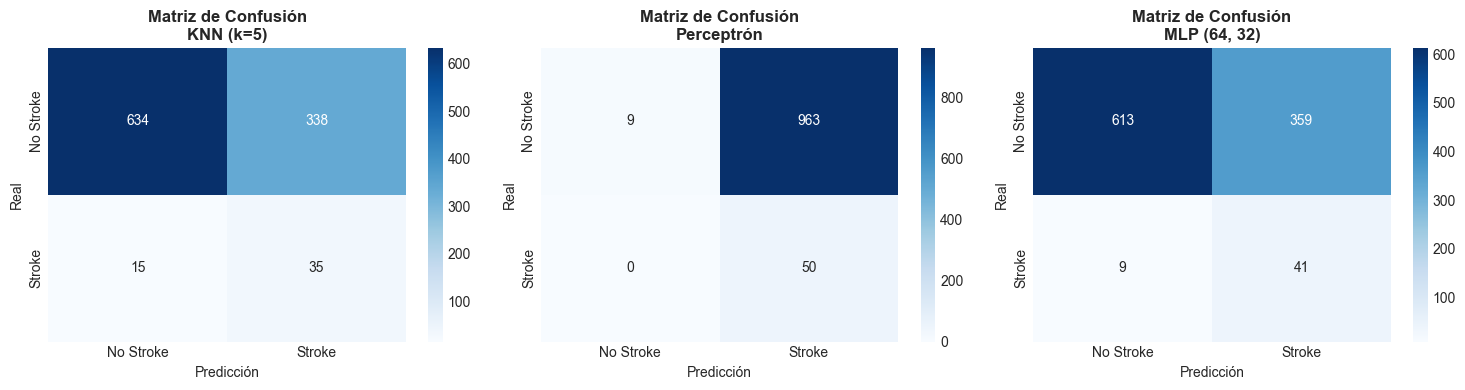

In [339]:
# Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cms = [knn_cm, perceptron_cm, mlp_cm]
titles = [f'KNN (k={best_k})', 'Perceptrón', f"MLP {best_mlp_config['hidden_layer_sizes']}"]

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    ax.set_title(f'Matriz de Confusión\n{title}', fontweight='bold')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()

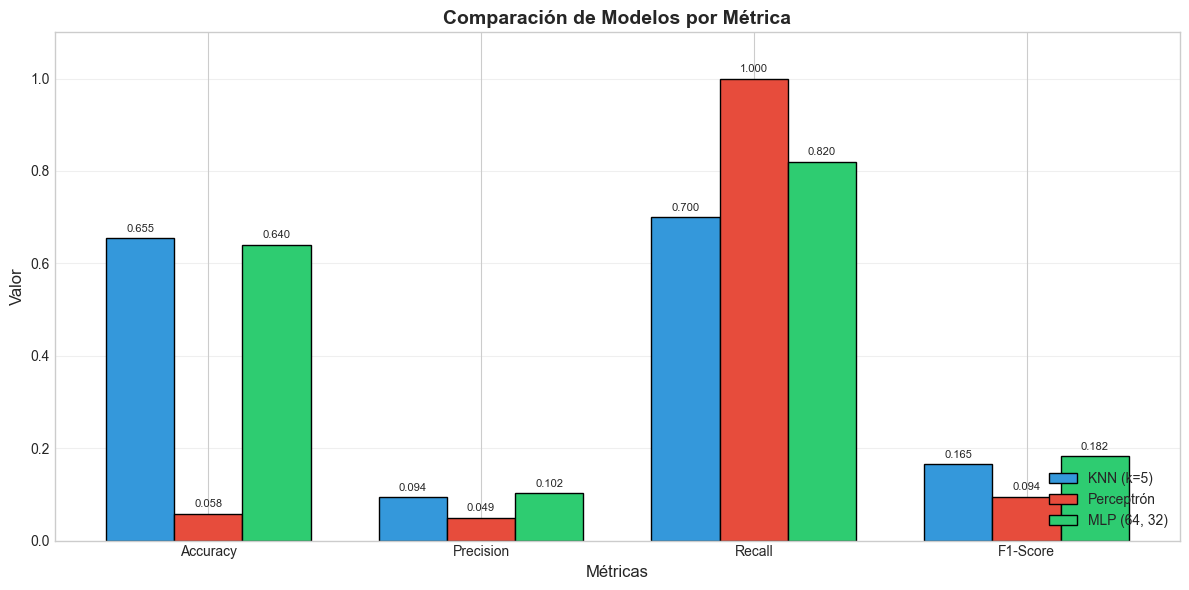

In [340]:
# Gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 6))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_to_plot))
width = 0.25

models = comparison_df['Modelo'].tolist()
colors = ['#3498db', '#e74c3c', '#2ecc71']

for i, (model, color) in enumerate(zip(models, colors)):
    values = comparison_df[comparison_df['Modelo'] == model][metrics_to_plot].values[0]
    bars = ax.bar(x + i*width, values, width, label=model, color=color, edgecolor='black')
    
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Comparación de Modelos por Métrica', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_to_plot)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [341]:
# Classification Reports detallados
print("="*60)
print("CLASSIFICATION REPORTS DETALLADOS")
print("="*60)

print(f"\n--- KNN (k={best_k}) ---")
print(classification_report(y_test, knn_pred, target_names=['No Stroke', 'Stroke']))

print("\n--- Perceptrón ---")
print(classification_report(y_test, perceptron_pred, target_names=['No Stroke', 'Stroke']))

print(f"\n--- MLP {best_mlp_config['hidden_layer_sizes']} ---")
print(classification_report(y_test, mlp_pred, target_names=['No Stroke', 'Stroke']))

CLASSIFICATION REPORTS DETALLADOS

--- KNN (k=5) ---
              precision    recall  f1-score   support

   No Stroke       0.98      0.65      0.78       972
      Stroke       0.09      0.70      0.17        50

    accuracy                           0.65      1022
   macro avg       0.54      0.68      0.47      1022
weighted avg       0.93      0.65      0.75      1022


--- Perceptrón ---
              precision    recall  f1-score   support

   No Stroke       1.00      0.01      0.02       972
      Stroke       0.05      1.00      0.09        50

    accuracy                           0.06      1022
   macro avg       0.52      0.50      0.06      1022
weighted avg       0.95      0.06      0.02      1022


--- MLP (64, 32) ---
              precision    recall  f1-score   support

   No Stroke       0.99      0.63      0.77       972
      Stroke       0.10      0.82      0.18        50

    accuracy                           0.64      1022
   macro avg       0.54      0.73

## 7. Conclusiones y modelo recomendado

In [342]:
print("="*60)
print("ANÁLISIS DE RESULTADOS")
print("="*60)

# Puntuación ponderada (Recall tiene más peso en contexto clínico)
comparison_df['Score'] = (comparison_df['Recall'] * 0.4 + 
                          comparison_df['F1-Score'] * 0.3 + 
                          comparison_df['Precision'] * 0.2 + 
                          comparison_df['Accuracy'] * 0.1)

best_overall_idx = comparison_df['Score'].idxmax()
recommended_model = comparison_df.loc[best_overall_idx, 'Modelo']

print(f"""
📊 ANÁLISIS:

1. ¿Qué modelo tiene mejor ACCURACY?
   → {comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Modelo']} 
     ({comparison_df['Accuracy'].max():.4f})

2. ¿Cuál tiene mejor RECALL para stroke=1?
   → {comparison_df.loc[comparison_df['Recall'].idxmax(), 'Modelo']} 
     ({comparison_df['Recall'].max():.4f})

3. En contexto CLÍNICO, ¿qué métrica es más importante?
   → RECALL: Detectar la mayor cantidad de pacientes con riesgo real de ACV
   → Un falso negativo (no detectar un paciente en riesgo) puede ser FATAL
   → Un falso positivo (alertar a alguien no en riesgo) solo genera más exámenes

4. ¿Se observa trade-off entre Precision y Recall?
   → Sí. Al aumentar Recall, típicamente disminuye Precision.
   → Esto es normal cuando la clase positiva es minoritaria.
   → F1-Score balancea ambas métricas.
""")

ANÁLISIS DE RESULTADOS

📊 ANÁLISIS:

1. ¿Qué modelo tiene mejor ACCURACY?
   → KNN (k=5) 
     (0.6546)

2. ¿Cuál tiene mejor RECALL para stroke=1?
   → Perceptrón 
     (1.0000)

3. En contexto CLÍNICO, ¿qué métrica es más importante?
   → RECALL: Detectar la mayor cantidad de pacientes con riesgo real de ACV
   → Un falso negativo (no detectar un paciente en riesgo) puede ser FATAL
   → Un falso positivo (alertar a alguien no en riesgo) solo genera más exámenes

4. ¿Se observa trade-off entre Precision y Recall?
   → Sí. Al aumentar Recall, típicamente disminuye Precision.
   → Esto es normal cuando la clase positiva es minoritaria.
   → F1-Score balancea ambas métricas.



In [343]:
print("="*60)
print("🏆 MODELO RECOMENDADO")
print("="*60)

print(f"""
RECOMENDACIÓN: {recommended_model}

JUSTIFICACIÓN:

1. MÉTRICAS:
   - Recall: {comparison_df.loc[best_overall_idx, 'Recall']:.4f} 
     (Capacidad de detectar pacientes en riesgo real)
   - F1-Score: {comparison_df.loc[best_overall_idx, 'F1-Score']:.4f} 
     (Balance entre Precision y Recall)
   - Accuracy: {comparison_df.loc[best_overall_idx, 'Accuracy']:.4f}

2. CONTEXTO CLÍNICO:
   - En predicción de ACV, es preferible tener falsos positivos 
     (sobrediagnóstico) que falsos negativos (no detectar pacientes en riesgo)
   - El costo de un falso negativo (ACV no detectado) es potencialmente 
     la vida del paciente
   - El costo de un falso positivo es solo exámenes adicionales

3. ASPECTOS PRÁCTICOS:
   - KNN: Simple, interpretable, sensible a la escala
   - Perceptrón: Lineal, rápido, pero limitado para patrones no lineales
   - MLP: Mayor capacidad de capturar patrones complejos, menos interpretable

4. LIMITACIONES:
   - Dataset originalmente muy desbalanceado (se usó SMOTE)
   - El modelo debe usarse como APOYO a la decisión médica, no como reemplazo
   - Se recomienda validación con datos reales de hospitales
""")

🏆 MODELO RECOMENDADO

RECOMENDACIÓN: MLP (64, 32)

JUSTIFICACIÓN:

1. MÉTRICAS:
   - Recall: 0.8200 
     (Capacidad de detectar pacientes en riesgo real)
   - F1-Score: 0.1822 
     (Balance entre Precision y Recall)
   - Accuracy: 0.6399

2. CONTEXTO CLÍNICO:
   - En predicción de ACV, es preferible tener falsos positivos 
     (sobrediagnóstico) que falsos negativos (no detectar pacientes en riesgo)
   - El costo de un falso negativo (ACV no detectado) es potencialmente 
     la vida del paciente
   - El costo de un falso positivo es solo exámenes adicionales

3. ASPECTOS PRÁCTICOS:
   - KNN: Simple, interpretable, sensible a la escala
   - Perceptrón: Lineal, rápido, pero limitado para patrones no lineales
   - MLP: Mayor capacidad de capturar patrones complejos, menos interpretable

4. LIMITACIONES:
   - Dataset originalmente muy desbalanceado (se usó SMOTE)
   - El modelo debe usarse como APOYO a la decisión médica, no como reemplazo
   - Se recomienda validación con datos reales

### 7.1 Reflexión sobre preprocesamiento

In [344]:
print("="*60)
print("REFLEXIÓN SOBRE PREPROCESAMIENTO")
print("="*60)

print("""
📝 REFLEXIONES:

1. ¿Qué ocurrió antes y después de ESCALAR?
   ANTES: Variables con diferentes rangos (age: 0-82, glucose: 55-270)
   DESPUÉS: Todas las variables tienen media≈0 y std≈1
   
   IMPACTO:
   - KNN: Sin escalar, la distancia euclidiana estaba dominada por glucose
   - MLP: Con datos normalizados, los gradientes son más estables
   - Perceptrón: Convergencia más rápida con datos escalados

2. ¿Qué sucedería si NO se imputan los valores faltantes?
   - ~200 registros con BMI faltante serían eliminados (4% del dataset)
   - Pérdida de información valiosa
   - Los modelos de sklearn lanzan errores con NaN
   - La imputación con mediana preserva la distribución

3. ¿El DESBALANCE de clases afectó alguna métrica?
   SIN SMOTE (como vimos en la verificación inicial):
   - KNN y MLP predecían SIEMPRE clase 0 (Recall = 0%)
   - Accuracy era ~95% pero completamente engañosa
   
   CON SMOTE:
   - Los modelos ahora detectan casos de stroke
   - Recall mejoró significativamente
   - Trade-off: Precision disminuyó (más falsos positivos)

4. POSIBLES MEJORAS:
   - Feature engineering: crear variables como age*hypertension
   - Probar otros algoritmos: Random Forest, XGBoost, SVM
   - Ajustar umbral de clasificación (no usar 0.5)
   - Validación con datos externos
""")

REFLEXIÓN SOBRE PREPROCESAMIENTO

📝 REFLEXIONES:

1. ¿Qué ocurrió antes y después de ESCALAR?
   ANTES: Variables con diferentes rangos (age: 0-82, glucose: 55-270)
   DESPUÉS: Todas las variables tienen media≈0 y std≈1

   IMPACTO:
   - KNN: Sin escalar, la distancia euclidiana estaba dominada por glucose
   - MLP: Con datos normalizados, los gradientes son más estables
   - Perceptrón: Convergencia más rápida con datos escalados

2. ¿Qué sucedería si NO se imputan los valores faltantes?
   - ~200 registros con BMI faltante serían eliminados (4% del dataset)
   - Pérdida de información valiosa
   - Los modelos de sklearn lanzan errores con NaN
   - La imputación con mediana preserva la distribución

3. ¿El DESBALANCE de clases afectó alguna métrica?
   SIN SMOTE (como vimos en la verificación inicial):
   - KNN y MLP predecían SIEMPRE clase 0 (Recall = 0%)
   - Accuracy era ~95% pero completamente engañosa

   CON SMOTE:
   - Los modelos ahora detectan casos de stroke
   - Recall mejo